In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazioni estetiche
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Carichiamo il dataset completo
df = pd.DataFrame()
file_path = '../data/f1_2023_processed.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset caricato correttamente!")
    print(f"Dimensioni: {df.shape}")
except FileNotFoundError:
    print("⚠️ Il file non esiste ancora. Aspetta che dataset_builder.py finisca!")

✅ Dataset caricato correttamente!
Dimensioni: (16145, 12)


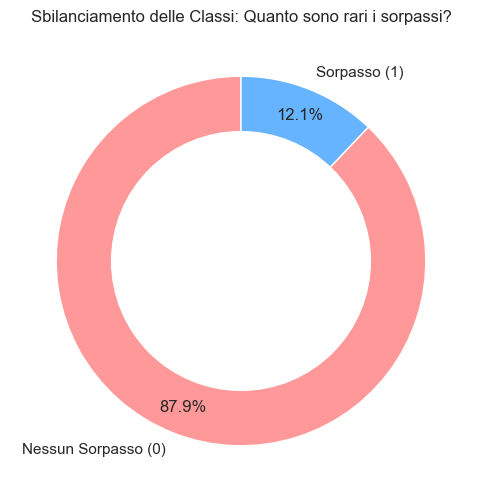

In [ ]:
# Grafico a Torta (Imbalance)
plt.figure(figsize=(6, 6))
labels = ['Nessun Sorpasso (0)', 'Sorpasso (1)']
sizes = [len(df[df['IsOvertake']==0]), len(df[df['IsOvertake']==1])]
colors = ['#ff9999', '#66b3ff'] # Rosso chiaro e Blu chiaro

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sbilanciamento delle Classi: Quanto sono rari i sorpassi?')
plt.show()

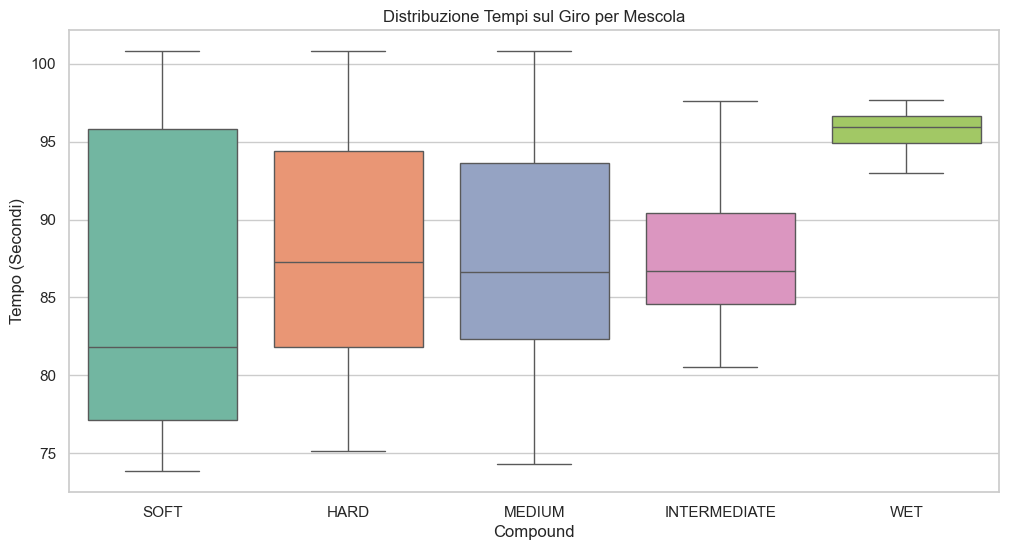

In [ ]:
# Tempi sul giro per Mescola
plt.figure(figsize=(12, 6))

# Filtriamo i tempi anomali (es. Safety Car) per rendere il grafico leggibile
# Prendiamo solo i tempi sotto il 95° percentile
clean_laps = df[df['LapTime_Sec'] < df['LapTime_Sec'].quantile(0.95)]

sns.boxplot(data=clean_laps, x='Compound', y='LapTime_Sec', palette="Set2", hue='Compound', legend=False)
plt.title('Distribuzione Tempi sul Giro per Mescola')
plt.ylabel('Tempo (Secondi)')
plt.show()

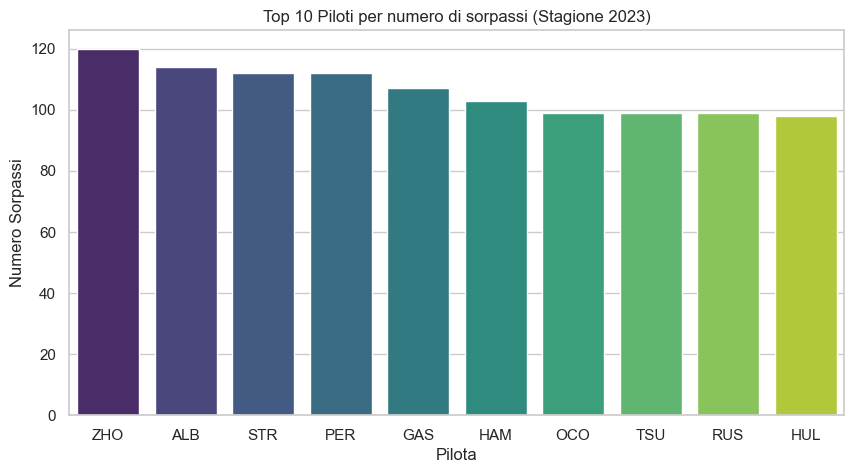

In [ ]:
# Top 10 Piloti per Sorpassi
overtakes_by_driver = df[df['IsOvertake'] == 1]['Driver'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=overtakes_by_driver.index, y=overtakes_by_driver.values, hue=overtakes_by_driver.index, palette="viridis", legend=False)
plt.title('Top 10 Piloti per numero di sorpassi (Stagione 2023)')
plt.ylabel('Numero Sorpassi')
plt.xlabel('Pilota')
plt.show()